In [4]:
import pandas as pd
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<Axes: ylabel='Frequency'>

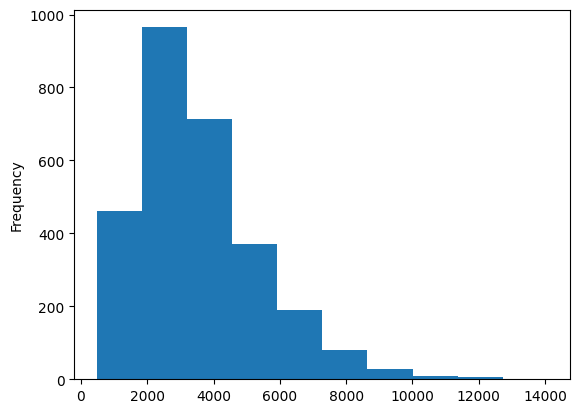

In [6]:
df.describe()
df.groupby("PRODUCTLINE")["SALES"].sum()
df["SALES"].plot(kind="hist")

In [26]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['SALES'], inplace=True)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("Sales", conn, index=False, if_exists="replace")

query = """
SELECT PRODUCTLINE, SUM(SALES) AS TotalSales
FROM Sales
GROUP BY PRODUCTLINE
ORDER BY TotalSales DESC;
"""

pd.read_sql_query(query, conn)

,PRODUCTLINE,TotalSales
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


In [30]:
df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=True)

PRODUCTLINE
Trains               226243.47
Ships                714437.13
Planes               975003.57
Trucks and Buses    1127789.84
Motorcycles         1166388.34
Vintage Cars        1903150.84
Classic Cars        3919615.66
Name: SALES, dtype: float64

<Axes: xlabel='PRODUCTLINE', ylabel='SALES'>

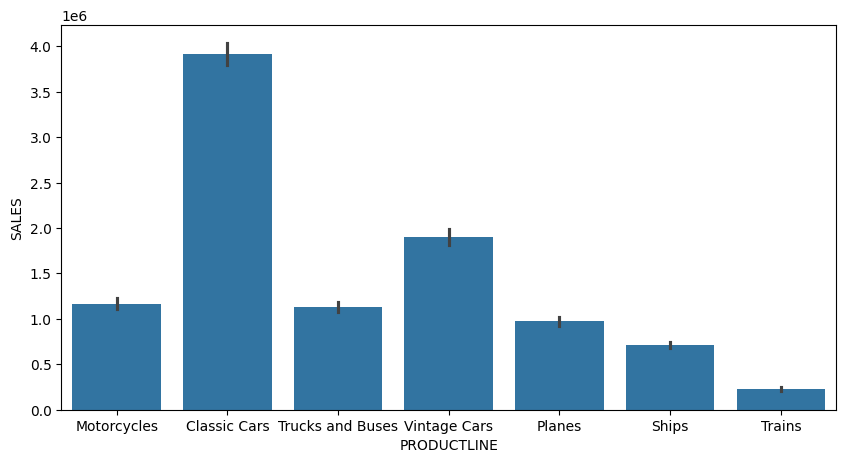

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="PRODUCTLINE", y="SALES", data=df, estimator=sum)

MAE : 1268.9075351357887


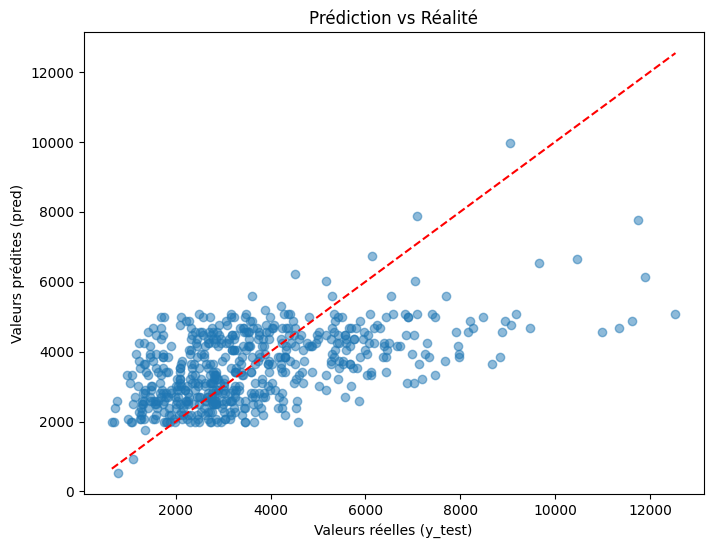

In [3]:
import pandas as pd
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['QUANTITYORDERED']]
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print("MAE :", mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (pred)")
plt.title("Prédiction vs Réalité")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale idéale
plt.show()

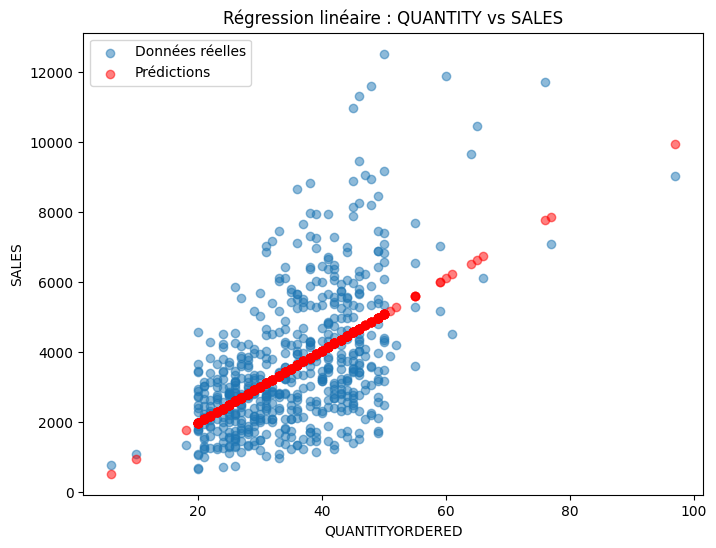

In [4]:
plt.figure(figsize=(8,6))

# Nuage de points réel
plt.scatter(X_test, y_test, alpha=0.5, label="Données réelles")

# Droite de régression prédite
plt.scatter(X_test, pred, color='red', alpha=0.5, label="Prédictions")

plt.xlabel("QUANTITYORDERED")
plt.ylabel("SALES")
plt.title("Régression linéaire : QUANTITY vs SALES")
plt.legend()
plt.show()

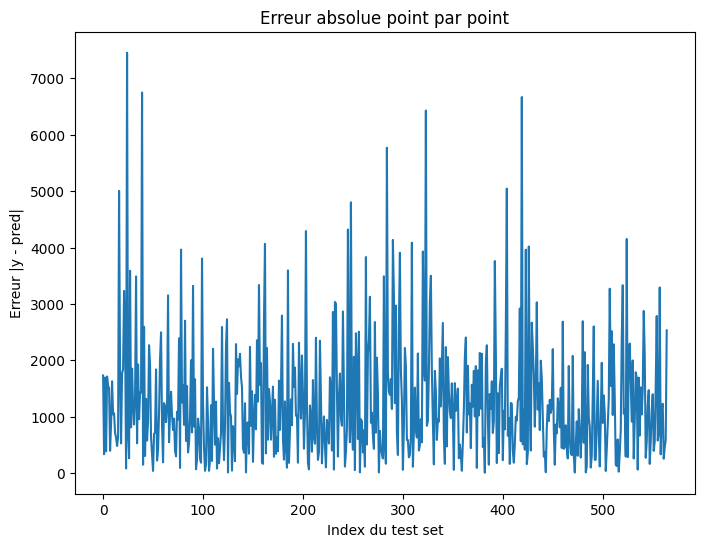

In [5]:
errors = abs(y_test - pred)

plt.figure(figsize=(8,6))
plt.plot(errors.values)
plt.title("Erreur absolue point par point")
plt.xlabel("Index du test set")
plt.ylabel("Erreur |y - pred|")
plt.show()